**INSIGHTS ON DATA**


*   Since there are a lot of columns this time i have decided to preprocess and analyse one column at a time which you can see as you move through the notebook
*   talking of the length i feel this a comparitively smaller dataset



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train (2).csv')
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,mw205674.txt,http://www.danangluxury.com,26,www.danangluxury.com,20.0,0.0,com,75.000000,1.000000,0.522907,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,712147.txt,https://www.leedstownhall.co.uk,30,www.leedstownhall.co.uk,23.0,0.0,uk,100.000000,0.875000,0.028555,...,0.0,0.0,1.0,37.0,41.0,46.0,104.0,3.0,93.0,1.0
2,806061.txt,https://www.mexicancafe.co.nz,28,www.mexicancafe.co.nz,21.0,0.0,nz,100.000000,0.857143,0.001993,...,1.0,0.0,0.0,14.0,4.0,14.0,51.0,0.0,7.0,1.0
3,164934.txt,https://www.usglassmag.com,25,www.usglassmag.com,18.0,0.0,com,100.000000,1.000000,0.522907,...,1.0,0.0,1.0,40.0,26.0,25.0,106.0,9.0,193.0,1.0
4,8131216.txt,https://cloudflare-ipfs.com/ipfs/bafybeicivf4l...,93,cloudflare-ipfs.com,19.0,0.0,com,23.030879,0.733333,0.522907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71738,mw141563.txt,http://www.2k3d.csqoy.com,24,www.2k3d.csqoy.com,18.0,0.0,com,49.523810,0.700000,0.522907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71739,oph01779.txt,https://54e8ced5d334-shared.lowcodeunit.com/,43,54e8ced5d334-shared.lowcodeunit.com,35.0,0.0,com,28.489796,0.483871,0.522907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71740,812627.txt,https://www.mississippi-umc.org,30,www.mississippi-umc.org,23.0,0.0,org,100.000000,0.800000,0.079963,...,0.0,0.0,0.0,5.0,3.0,4.0,71.0,0.0,25.0,1.0
71741,38185.txt,https://www.sosoactive.com,25,www.sosoactive.com,18.0,0.0,com,100.000000,1.000000,0.522907,...,0.0,0.0,1.0,31.0,12.0,14.0,136.0,4.0,145.0,1.0


ohk so the dataset provided has a hell lot of parameters i see hehe
lets go one by one

first is the url length lets keep it as it is no changes normally lengthy urls may be fishier as compared to shorter ones

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-8-9e4bf1910430>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_counts = df.groupby('LengthRange').apply(lambda x: (x['label'] == 0).mean()) * 100   # percentage of fishy URLs
<ipython-input-8-9e4bf1910430>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  range_counts = df.groupby('LengthRange').apply(lambda x: (x['label'] == 0).mean()) * 100   # percentage of fishy URLs


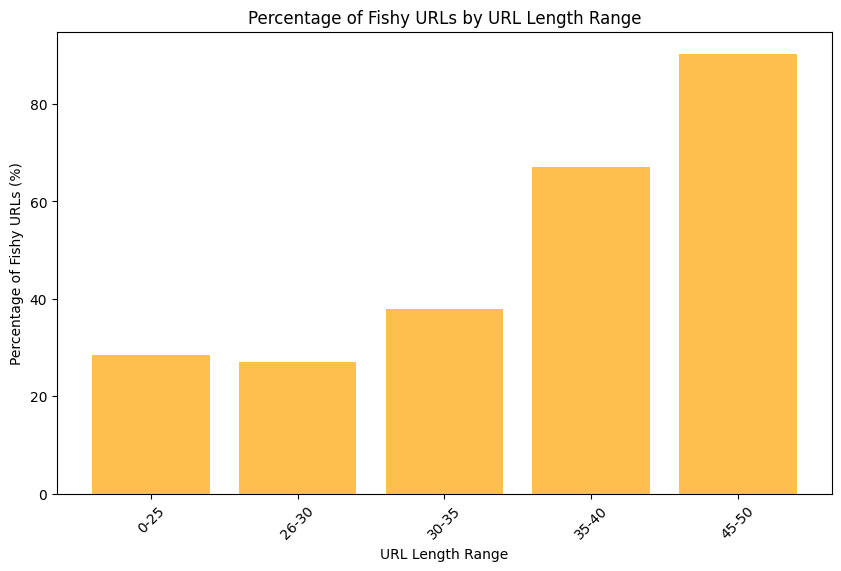

In [ ]:
bins = [0, 25, 30, 35, 40, 45]
labels = ['0-25', '26-30', '30-35', '35-40', '45-50']
df['LengthRange'] = pd.cut(df['URLLength'], bins=bins, labels=labels, right=True)

range_counts = df.groupby('LengthRange').apply(lambda x: (x['label'] == 0).mean()) * 100   # percentage of fishy URLs

plt.figure(figsize=(10, 6))
plt.bar(range_counts.index, range_counts.values, color='orange', alpha=0.7)
plt.xlabel('URL Length Range')
plt.ylabel('Percentage of Fishy URLs (%)')
plt.title('Percentage of Fishy URLs by URL Length Range')
plt.xticks(rotation=45)
plt.show()

Now for the URL column we are mainly concerned with whether we have http or https

<ipython-input-16-7c8a86a45f20>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  protocol_counts = df.groupby('Protocol').apply(lambda x: (x['label'] == 0).mean()) * 100  # percentage of fishy URLs


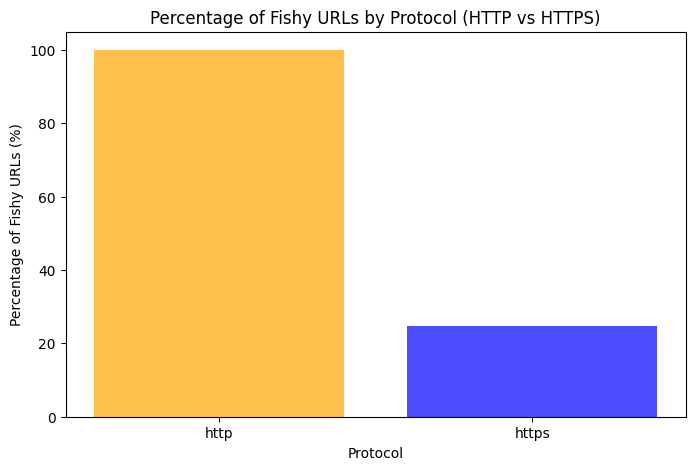

In [ ]:
df['Protocol'] = df['URL'].apply(lambda x: x.split(':')[0])

protocol_counts = df.groupby('Protocol').apply(lambda x: (x['label'] == 0).mean()) * 100  # percentage of fishy URLs

plt.figure(figsize=(8, 5))
plt.bar(protocol_counts.index, protocol_counts.values, color=['orange', 'blue'], alpha=0.7)
plt.xlabel('Protocol')
plt.ylabel('Percentage of Fishy URLs (%)')
plt.title('Percentage of Fishy URLs by Protocol (HTTP vs HTTPS)')
plt.show()

haha kindof expected that 100% of http urls are fishy

so we will likely give our model a condition regarding that

we can skip the isdomainip that does'nt require any preprocessing

we move to TLD the only preprocessing it requires is one hot labelling that we will do together for all the parameters so we can just check once the ratio of fishy to not fishy for all different TLDs

<ipython-input-13-5bcf3d048888>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tld_counts = df.groupby('TLD').apply(lambda x: (x['label'] == 0).mean()) * 100  # percentage of fishy URLs


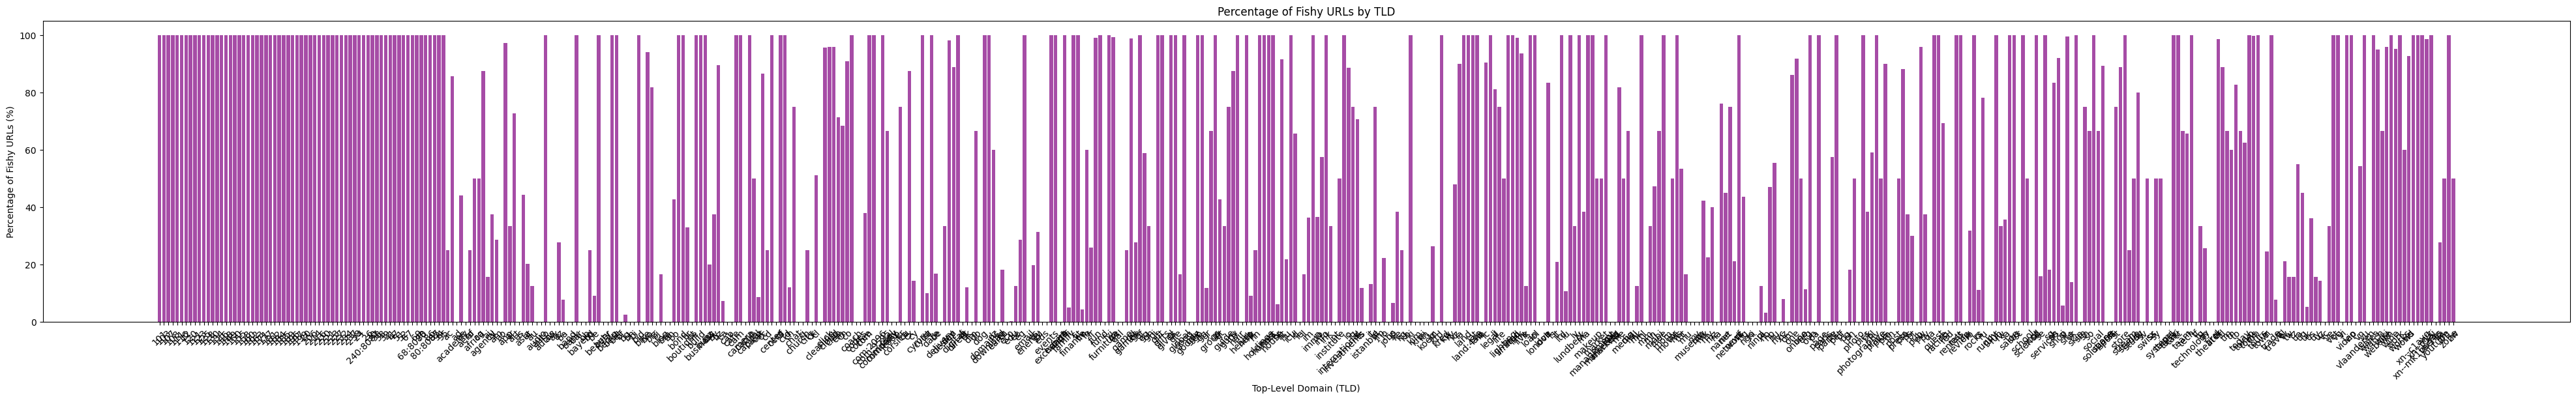

In [ ]:
tld_counts = df.groupby('TLD').apply(lambda x: (x['label'] == 0).mean()) * 100  # percentage of fishy URLs

# Plot the histogram
plt.figure(figsize=(50, 6))
plt.bar(tld_counts.index, tld_counts.values, color='purple', alpha=0.7)
plt.xlabel('Top-Level Domain (TLD)')
plt.ylabel('Percentage of Fishy URLs (%)')
plt.title('Percentage of Fishy URLs by TLD')
plt.xticks(rotation=45)
plt.show()

ohk this doesnt make sense i did'nt expect so many different TLDs lets try something clean

In [ ]:
tld_stats = df.groupby('TLD')['label'].agg(['count', 'sum'])  # count total URLs per TLD and sum of labels (fishy URLs)
tld_stats['fishy_percentage'] = tld_stats['sum'] / tld_stats['count'] * 100  # percentage of fishy URLs

# Step 2: Group TLDs based on fishy URL percentage
# You can define your own thresholds for groups. Here, we use arbitrary thresholds:
# 0-20% -> Group 1, 20-50% -> Group 2, 50-100% -> Group 3
def categorize_group(fishy_percentage):
    if fishy_percentage <= 0:
        return 1
    elif fishy_percentage <= 25:
        return 2
    elif fishy_percentage <= 50:
        return 3
    elif fishy_percentage <= 75:
        return 4
    elif fishy_percentage <100:
        return 5
    else:
      return 6

# Apply the function to categorize each TLD
tld_stats['group'] = tld_stats['fishy_percentage'].apply(categorize_group)

# Step 3: Merge this information back with the main dataset
df = df.merge(tld_stats[['group']], on='TLD', how='left')

# Step 4: For the test data, you can apply the same procedure but without the labels
# Assuming test_data is your test DataFrame, apply the same logic to assign groups
test_data = pd.read_csv('test (1).csv')

# Merge the TLD group information from training data to test data
test_data = test_data.merge(tld_stats[['group']], on='TLD', how='left')

# Display the result
print(test_data[['URL', 'TLD', 'group']])

                                                     URL  TLD  group
0         http://marshy-sudden-couch.glitch.me/ghuve.htm   me    2.0
1      https://blue-snowflake-573d.ovrchukicyvmee6167...  dev    2.0
2            https://mail34.godaddysites.com/at%26t-mail  com    4.0
3                               https://www.berntsen.com  com    4.0
4                       http://www.poczta.blocktrail.com  com    4.0
...                                                  ...  ...    ...
29995                        http://www.document-buh.com  com    4.0
29996                            https://www.artxzay.com  com    4.0
29997                    https://www.truthaboutdeath.com  com    4.0
29998  https://novo-sicredi-black.com/?page=home&amp;...  com    4.0
29999                       https://www.genealogyinc.com  com    4.0

[30000 rows x 3 columns]


In [ ]:
df = df.drop(columns=['group_x'])  # or df = df.drop(columns=['group_y'])
df = df.rename(columns={'group_y': 'group'})

In [ ]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,Protocol,TLDGroup
0,mw205674.txt,http://www.danangluxury.com,26,www.danangluxury.com,20.0,0.0,75.000000,1.000000,0.522907,0.049839,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,http,3.0
1,712147.txt,https://www.leedstownhall.co.uk,30,www.leedstownhall.co.uk,23.0,0.0,100.000000,0.875000,0.028555,0.058238,...,1.0,37.0,41.0,46.0,104.0,3.0,93.0,1.0,https,2.0
2,806061.txt,https://www.mexicancafe.co.nz,28,www.mexicancafe.co.nz,21.0,0.0,100.000000,0.857143,0.001993,0.065825,...,0.0,14.0,4.0,14.0,51.0,0.0,7.0,1.0,https,2.0
3,164934.txt,https://www.usglassmag.com,25,www.usglassmag.com,18.0,0.0,100.000000,1.000000,0.522907,0.058172,...,1.0,40.0,26.0,25.0,106.0,9.0,193.0,1.0,https,3.0
4,8131216.txt,https://cloudflare-ipfs.com/ipfs/bafybeicivf4l...,93,cloudflare-ipfs.com,19.0,0.0,23.030879,0.733333,0.522907,0.035517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71738,mw141563.txt,http://www.2k3d.csqoy.com,24,www.2k3d.csqoy.com,18.0,0.0,49.523810,0.700000,0.522907,0.042772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http,3.0
71739,oph01779.txt,https://54e8ced5d334-shared.lowcodeunit.com/,43,54e8ced5d334-shared.lowcodeunit.com,35.0,0.0,28.489796,0.483871,0.522907,0.048664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https,3.0
71740,812627.txt,https://www.mississippi-umc.org,30,www.mississippi-umc.org,23.0,0.0,100.000000,0.800000,0.079963,0.057382,...,0.0,5.0,3.0,4.0,71.0,0.0,25.0,1.0,https,2.0
71741,38185.txt,https://www.sosoactive.com,25,www.sosoactive.com,18.0,0.0,100.000000,1.000000,0.522907,0.072030,...,1.0,31.0,12.0,14.0,136.0,4.0,145.0,1.0,https,3.0


successfully sorted our TLDs into groups
for the next step i would be multiplying all our ratios by 100 to make the division more prominent in the random forest classifier that i am going to use

In [ ]:
df['ObfuscationRatio'] = df['ObfuscationRatio'] * 100
df['LetterRatioInURL'] = df['LetterRatioInURL'] * 100
df['DegitRatioInURL'] = df['DegitRatioInURL'] * 100
df['SpacialCharRatioInURL'] = df['SpacialCharRatioInURL'] * 100

In [ ]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,Protocol,TLDGroup
0,mw205674.txt,http://www.danangluxury.com,26,www.danangluxury.com,20.0,0.0,75.000000,1.000000,0.522907,0.049839,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,http,3.0
1,712147.txt,https://www.leedstownhall.co.uk,30,www.leedstownhall.co.uk,23.0,0.0,100.000000,0.875000,0.028555,0.058238,...,1.0,37.0,41.0,46.0,104.0,3.0,93.0,1.0,https,2.0
2,806061.txt,https://www.mexicancafe.co.nz,28,www.mexicancafe.co.nz,21.0,0.0,100.000000,0.857143,0.001993,0.065825,...,0.0,14.0,4.0,14.0,51.0,0.0,7.0,1.0,https,2.0
3,164934.txt,https://www.usglassmag.com,25,www.usglassmag.com,18.0,0.0,100.000000,1.000000,0.522907,0.058172,...,1.0,40.0,26.0,25.0,106.0,9.0,193.0,1.0,https,3.0
4,8131216.txt,https://cloudflare-ipfs.com/ipfs/bafybeicivf4l...,93,cloudflare-ipfs.com,19.0,0.0,23.030879,0.733333,0.522907,0.035517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71738,mw141563.txt,http://www.2k3d.csqoy.com,24,www.2k3d.csqoy.com,18.0,0.0,49.523810,0.700000,0.522907,0.042772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http,3.0
71739,oph01779.txt,https://54e8ced5d334-shared.lowcodeunit.com/,43,54e8ced5d334-shared.lowcodeunit.com,35.0,0.0,28.489796,0.483871,0.522907,0.048664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https,3.0
71740,812627.txt,https://www.mississippi-umc.org,30,www.mississippi-umc.org,23.0,0.0,100.000000,0.800000,0.079963,0.057382,...,0.0,5.0,3.0,4.0,71.0,0.0,25.0,1.0,https,2.0
71741,38185.txt,https://www.sosoactive.com,25,www.sosoactive.com,18.0,0.0,100.000000,1.000000,0.522907,0.072030,...,1.0,31.0,12.0,14.0,136.0,4.0,145.0,1.0,https,3.0


i think we are good to go rest columns dont require any preprocessing

also i just found out ishttps column was already present hehehhe and there was no need to extract it from our url for the chart hehehehehe

one last problem there are some NAN values remaining

In [ ]:
nan_columns = df.columns[df.isna().any()].tolist()

# Output the columns with NaN values
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label', 'TLDGroup']


In [ ]:
df= df.dropna()

In [ ]:
X = df.drop(columns=['FILENAME', 'label','URL','Domain','Title','TLD'])
y = df['label']

In [ ]:
X

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,TLDGroup
0,26,20.0,0.0,75.000000,1.000000,0.522907,0.049839,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
1,30,23.0,0.0,100.000000,0.875000,0.028555,0.058238,2.0,2.0,0.0,...,0.0,0.0,1.0,37.0,41.0,46.0,104.0,3.0,93.0,2.0
2,28,21.0,0.0,100.000000,0.857143,0.001993,0.065825,2.0,2.0,0.0,...,1.0,0.0,0.0,14.0,4.0,14.0,51.0,0.0,7.0,2.0
3,25,18.0,0.0,100.000000,1.000000,0.522907,0.058172,3.0,1.0,0.0,...,1.0,0.0,1.0,40.0,26.0,25.0,106.0,9.0,193.0,3.0
4,93,19.0,0.0,23.030879,0.733333,0.522907,0.035517,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71738,24,18.0,0.0,49.523810,0.700000,0.522907,0.042772,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
71739,43,35.0,0.0,28.489796,0.483871,0.522907,0.048664,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
71740,30,23.0,0.0,100.000000,0.800000,0.079963,0.057382,3.0,1.0,0.0,...,0.0,0.0,0.0,5.0,3.0,4.0,71.0,0.0,25.0,2.0
71741,25,18.0,0.0,100.000000,1.000000,0.522907,0.072030,3.0,1.0,0.0,...,0.0,0.0,1.0,31.0,12.0,14.0,136.0,4.0,145.0,3.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

**TRAINING THE MODEL**


*   training the model using random forest classifier
*   No insights this time its just that i like the random forst model

*   Also planning to use KNN classifier in the future if random forest fails which i guess wont happen



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=69)

rf_classifier = RandomForestClassifier(n_estimators=700, random_state=69)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluating the model using F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' handles imbalanced classes
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9999


In [ ]:

test_df = test_data.drop(columns=['TLD'])
test_df['ObfuscationRatio'] = test_df['ObfuscationRatio'] * 100
test_df['LetterRatioInURL'] = test_df['LetterRatioInURL'] * 100
test_df['DegitRatioInURL'] = test_df['DegitRatioInURL'] * 100
test_df['SpacialCharRatioInURL'] = test_df['SpacialCharRatioInURL'] * 100


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,group
0,8095287.txt,http://marshy-sudden-couch.glitch.me/ghuve.htm,46,marshy-sudden-couch.glitch.me,29,0,33.392505,0.269231,0.003638,0.050285,...,0,0,0,0,0,0,0,0,0,2.0
1,8138908.txt,https://blue-snowflake-573d.ovrchukicyvmee6167...,95,blue-snowflake-573d.ovrchukicyvmee6167.workers...,50,0,12.878488,0.413043,0.000961,0.032105,...,1,0,0,0,0,4,0,0,0,2.0
2,8058506.txt,https://mail34.godaddysites.com/at%26t-mail,43,mail34.godaddysites.com,23,0,40.526077,0.789474,0.522907,0.052253,...,0,0,1,2,0,6,2,0,2,4.0
3,520305.txt,https://www.berntsen.com,23,www.berntsen.com,16,0,100.000000,1.000000,0.522907,0.066502,...,1,0,1,12,4,9,353,0,336,4.0
4,mw10079.txt,http://www.poczta.blocktrail.com,31,www.poczta.blocktrail.com,25,0,61.080190,0.647059,0.522907,0.059920,...,0,0,0,0,0,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,mw4286.txt,http://www.document-buh.com,26,www.document-buh.com,20,0,72.126105,0.750000,0.522907,0.058064,...,0,0,0,0,0,0,0,0,0,4.0
29996,643720.txt,https://www.artxzay.com,22,www.artxzay.com,15,0,100.000000,1.000000,0.522907,0.053063,...,1,0,1,27,3,24,102,0,11,4.0
29997,452512.txt,https://www.truthaboutdeath.com,30,www.truthaboutdeath.com,23,0,100.000000,1.000000,0.522907,0.057462,...,0,0,1,29,2,6,65,0,29,4.0
29998,7997647.txt,https://novo-sicredi-black.com/?page=home&amp;...,337,novo-sicredi-black.com,22,0,3.656771,0.444444,0.522907,0.030133,...,0,0,0,1,5,11,0,0,5,4.0


**PREDICTING**

In [ ]:
X_test = test_df.drop(columns=['FILENAME','URL','Domain','Title'])
predictions = rf_classifier.predict(X_test)

output = pd.DataFrame({'FILENAME': test_df['FILENAME'], 'label': predictions})

output.to_csv('predictions2.csv', index=False)

print("Predictions saved to predictions2.csv")

Predictions saved to predictions2.csv


**FINAL CONCLUSION**


*   Nothing to say
*   quite an easy problem statement with very easy dataset


*   I mean it would have been a challenge if the columns like the isHTTPS and the URL length etc were not present and then we had to deduce everything fron the URL itself that to be honest would have required feature engineering to some extent but here everything was already provided and yaa it was quite eay
*   improvements - probably knn would have performed better but random forest also was great


